In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Загружаем таблицу с данными аннотаций к нашему датасету

In [3]:
url='https://drive.google.com/file/d/1uIXAhjcQ63j78YygE39OqAf5QexCOqsb/view?usp=drive_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.head()

,image,class_id,center x,center y,width,height
0,MVI_20011_img00001.txt,8.0,0.955729,0.218519,0.088542,0.062963
1,MVI_20011_img00001.txt,2.0,0.788542,0.248148,0.054167,0.074074
2,MVI_20011_img00001.txt,2.0,0.701042,0.851852,0.166667,0.300000
3,MVI_20011_img00001.txt,2.0,0.543750,0.150000,0.029167,0.048148
4,MVI_20011_img00001.txt,2.0,0.970313,0.562963,0.061458,0.200000


Добавляем в таблицу необходимые столбцы и корректируем имеющиеся: меняем тип данных в class_id на int для удобства, добавляем единичку для корректной классификации, создаем столбец с текстовым названием классов объектов, в столбце 'image' обрезаем .txt, создаем столбец с площадью объекта

In [4]:
df['class_id'] = df['class_id'].astype('int')
df['class_id'] = df['class_id'] + 1
df['image'] = df['image'].apply(lambda x: x[:-4])
df['class_id'] = df['class_id'].astype(int)
def class_to_name(id):
  if id == 1:
    return 'bicycle'
  elif id == 2:
    return 'motorcycle'
  elif id == 3:
    return 'car'
  elif id == 4:
    return 'transporter (van)'
  elif id == 5:
    return 'bus'
  elif id == 6:
    return 'truck (others)'
  elif id == 8:
    return 'unknown'
  elif id == 9:
    return 'mask'
df['class_name'] = df['class_id'].apply(class_to_name)
df['bbox_square'] = df['width'] * df['height']

In [121]:
df.head()

,image,class_id,center x,center y,width,height,class_name,bbox_square
0,MVI_20011_img00001,9,0.955729,0.218519,0.088542,0.062963,mask,0.005575
1,MVI_20011_img00001,3,0.788542,0.248148,0.054167,0.074074,car,0.004012
2,MVI_20011_img00001,3,0.701042,0.851852,0.166667,0.300000,car,0.050000
3,MVI_20011_img00001,3,0.543750,0.150000,0.029167,0.048148,car,0.001404
4,MVI_20011_img00001,3,0.970313,0.562963,0.061458,0.200000,car,0.012292


Количество изображений в датасете. Количество объектов в изображении

In [6]:
df.info()
df['image'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992180 entries, 0 to 992179
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   image        992180 non-null  object 
 1   class_id     992180 non-null  int64  
 2   center x     992180 non-null  float64
 3   center y     992180 non-null  float64
 4   width        992180 non-null  float64
 5   height       992180 non-null  float64
 6   class_name   992180 non-null  object 
 7   bbox_square  992180 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 60.6+ MB


83756

Среднее количество объектов на картинке

In [7]:
df['image'].count() / df['image'].nunique()

11.84607669898276

Распределение объектов разных классов в датасете

In [8]:
df.groupby(['class_name'])['image'].count()

,image
class_name,
bicycle,4220
bus,33622
car,486026
mask,400585
motorcycle,6623
transporter (van),56743
truck (others),3525
unknown,836


Распределение объектов разных классов в датасете в процентом соотношении

In [13]:
df.groupby(['class_name'])['image'].count() / df['image'].count() * 100

,image
class_name,
bicycle,0.425326
bus,3.388700
car,48.985668
mask,40.374226
motorcycle,0.667520
transporter (van),5.719023
truck (others),0.355278
unknown,0.084259


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'mask'),
  Text(1, 0, 'car'),
  Text(2, 0, 'transporter (van)'),
  Text(3, 0, 'truck (others)'),
  Text(4, 0, 'bus'),
  Text(5, 0, 'motorcycle'),
  Text(6, 0, 'unknown'),
  Text(7, 0, 'bicycle')])

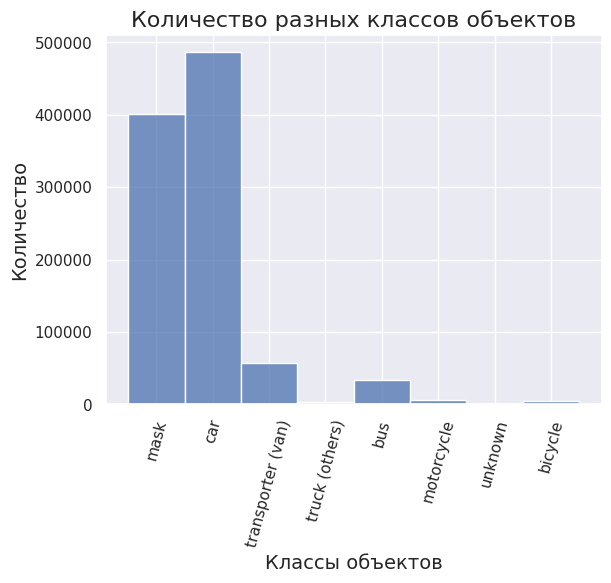

In [14]:
sns.set_theme(style="darkgrid")
plot = sns.histplot(data=df, x="class_name")
plot.axes.set_title("Количество разных классов объектов", fontsize=16)
plot.set_xlabel("Классы объектов", fontsize=14)
plot.set_ylabel("Количество", fontsize=14);
plt.xticks(rotation=75)

Средний размер (площадь) bbox по классам

In [126]:
df.groupby(['class_name']).agg(mean = ('bbox_square', 'mean'))

,mean
class_name,
bicycle,0.004044
bus,0.061244
car,0.011969
mask,0.029105
motorcycle,0.004762
transporter (van),0.018848
truck (others),0.036613
unknown,0.007589


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'mask'),
  Text(1, 0, 'car'),
  Text(2, 0, 'transporter (van)'),
  Text(3, 0, 'truck (others)'),
  Text(4, 0, 'bus'),
  Text(5, 0, 'motorcycle'),
  Text(6, 0, 'unknown'),
  Text(7, 0, 'bicycle')])

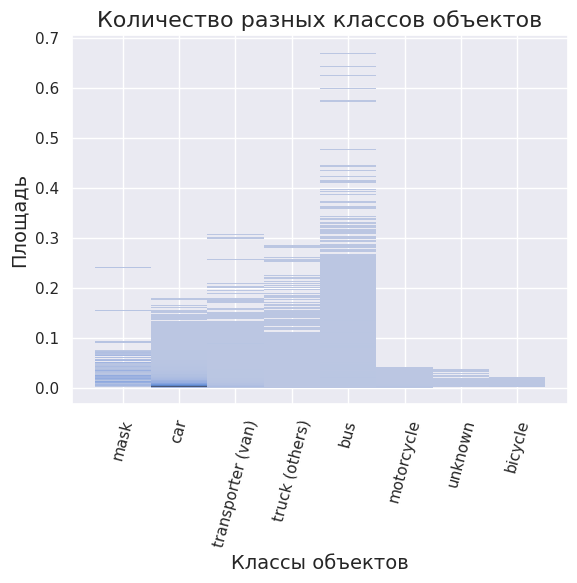

In [16]:
sns.set_theme(style="darkgrid")
histplot = sns.histplot(data=df, x="class_name", y = 'bbox_square')
histplot.axes.set_title("Количество разных классов объектов", fontsize=16)
histplot.set_xlabel("Классы объектов", fontsize=14)
histplot.set_ylabel("Площадь", fontsize=14);
plt.xticks(rotation=75)